# 2. Edge Detection

## 2.1 Sobel edge detector

### 1. Effect of sharpening on edge detection

### Sobel edge detector no enhancements, using intensity thresholds

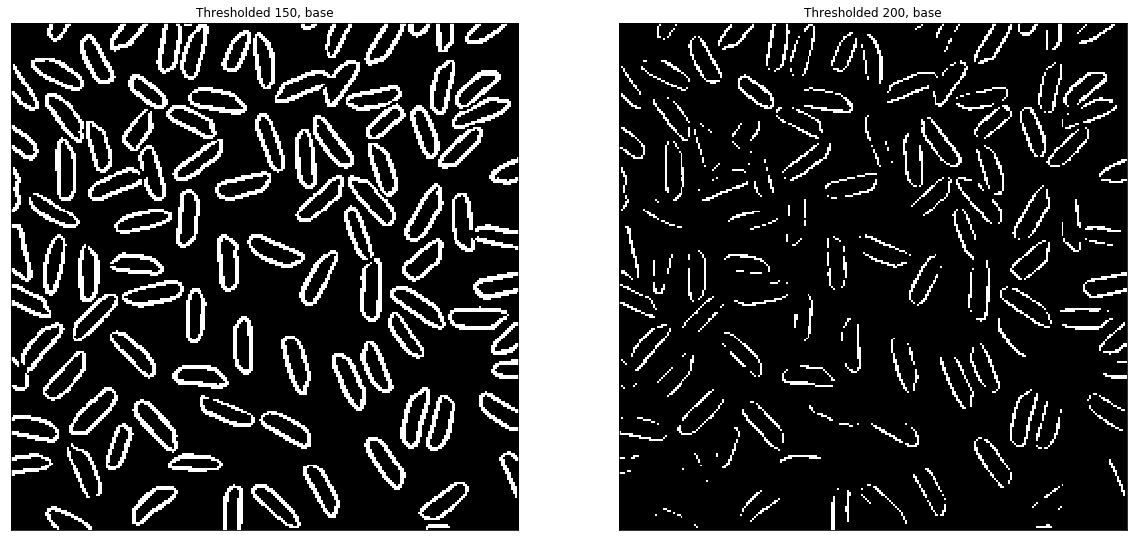

In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# load image of rice as a grayscale image
rice_path = "./rice.png"
rice = cv2.imread(rice_path, cv2.IMREAD_GRAYSCALE)

# Applies a Sobel edge detecotor for x-axis and y-axis
rice_x = cv2.Sobel(rice, cv2.CV_64F, 1, 0, ksize=3)
rice_y = cv2.Sobel(rice, cv2.CV_64F, 0, 1, ksize=3)

# Makes an edge detected image
rice_mag = cv2.magnitude(rice_x, rice_y)

# Gets the width and height of edge detected image
height, width = rice_mag.shape

# Sets a threshold of 150
THRESH1 = 150

# Inializes a blank image with the same width and height as the 
# edge detected image for the tresholded at 150 image 
rice_thresh1 = np.zeros((height, width), dtype=np.uint8)

# If the intensity of the pixel is higher then 150 insert a white
# point in the rice_thresh1 image
for row in range(0, height):
    for col in range(0, width):
        if rice_mag[row,col] > THRESH1:
            rice_thresh1[row, col] = 255

# Sets a threshold of 200
THRESH2 = 200

# Inializes a blank image with the same width and height as the 
# edge detected image for the thresholded at 200 image
rice_thresh2 = np.zeros((height, width), dtype=np.uint8)

# If the intensity of the pixel is higher then 200 insert a white
# point in the rice_thresh2 image
for row in range(0, height):
    for col in range(0, width):
        if rice_mag[row,col] > THRESH2:
            rice_thresh2[row, col] = 255
            
# Plots the image thresholded at 150 and the image thresholded at 200
plt.figure(figsize=(20, 20))
plt.subplot(121), plt.imshow(rice_thresh1, cmap="gray")
plt.title("Thresholded 150, base"), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(rice_thresh2, cmap="gray")
plt.title("Thresholded 200, base"), plt.xticks([]), plt.yticks([])
plt.show()

### Sobel edge detector with sharpening

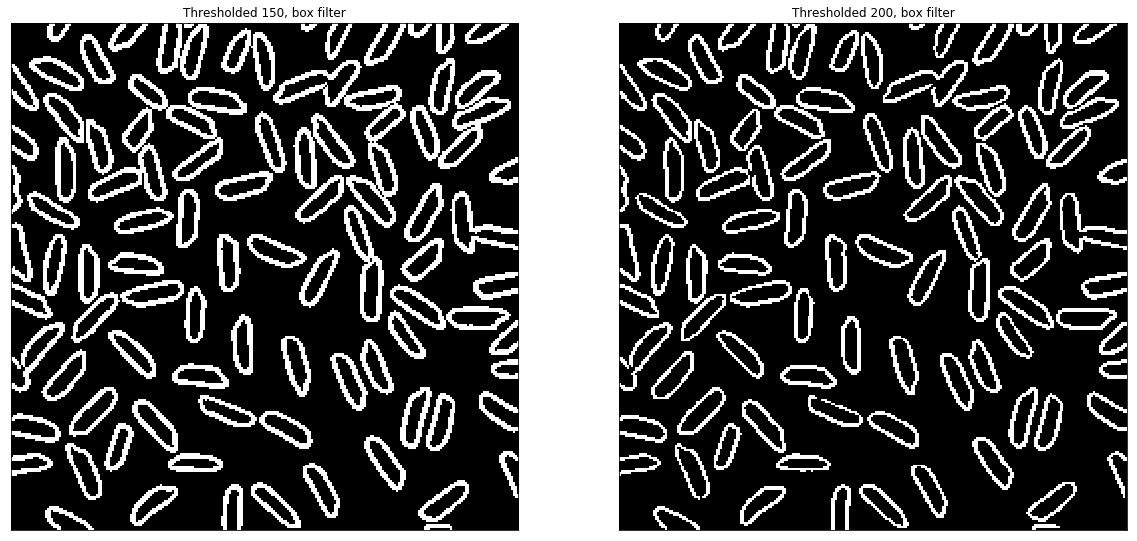

In [2]:
# Creates a 5x5 kernel for filtering 
kernel = np.ones((5,5), np.float32)/(5*5)

# Creates a sharpened image using a box filter
box_rice = cv2.filter2D(rice, -1, kernel)
details1 = rice - box_rice
sharpened_rice1 = rice + details1

# Applies a Sobel egde detector for both the x and y axies
# (for shapened image, box filter)
sharpened_rice1_x = cv2.Sobel(sharpened_rice1, cv2.CV_64F, 1, 0, ksize=3)
sharpened_rice1_y = cv2.Sobel(sharpened_rice1, cv2.CV_64F, 0, 1, ksize=3)

# Creates an egde detected image
# (for shapened image, box filter)
sharpened_rice1_mag = cv2.magnitude(sharpened_rice1_x, sharpened_rice1_y)

# Gets the width and height of edge detected image
height, width = sharpened_rice1_mag.shape

# Sets a threshold of 150
THRESH3 = 150

# Inializes a blank image with the same width and height as the 
# edge detected image for the tresholded at 150 image 
# (for shapened image, box filter)
sharpened_rice1_thresh1 = np.zeros((height, width), dtype=np.uint8)

# If the intensity of the pixel is higher then 150 insert a white
# point in the sharpened1_rice_thresh1 image
for row in range(0, height):
    for col in range(0, width):
        if sharpened_rice1_mag[row,col] > THRESH3:
            sharpened_rice1_thresh1[row, col] = 255

# Sets a threshold of 200
THRESH4 = 200

# Inializes a blank image with the same width and height as the 
# edge detected image for the tresholded at 200 image 
# (for shapened image, box filter)
sharpened_rice1_thresh2 = np.zeros((height, width), dtype=np.uint8)

# If the intensity of the pixel is higher then 200 insert a white
# point in the sharpened_rice1_thresh2 image
for row in range(0, height):
    for col in range(0, width):
        if sharpened_rice1_mag[row,col] > THRESH4:
            sharpened_rice1_thresh2[row, col] = 255

# Plots the image thresholded at 150 and the image thresholded at 200
# after initial sharpening
plt.figure(figsize=(20, 20))
plt.subplot(121), plt.imshow(sharpened_rice1_thresh1, cmap="gray")
plt.title("Thresholded 150, box filter"), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(sharpened_rice1_thresh2, cmap="gray")
plt.title("Thresholded 200, box filter"), plt.xticks([]), plt.yticks([])
plt.show()

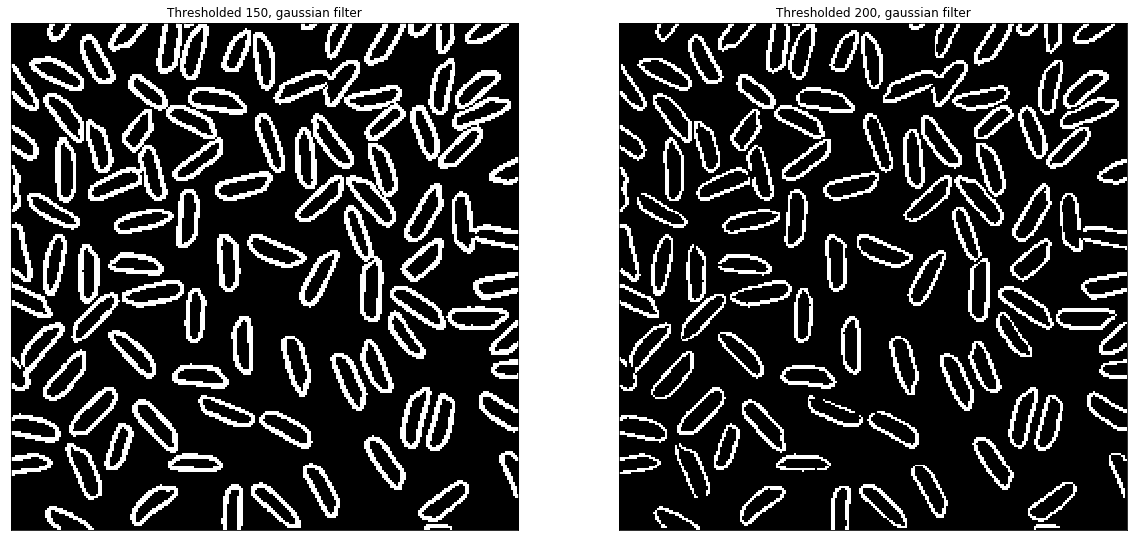

In [3]:
# Creates a sharpened image using a gaussian filter
gaussian_rice = cv2.GaussianBlur(rice, (5,5), 2**(1/2), 2**(1/2))
details2 = rice - gaussian_rice
sharpened_rice2 = rice + details2

# Applies a Sobel egde detector for both the x and y axies
# (for shapened image, gaussian filter)
sharpened_rice2_x = cv2.Sobel(sharpened_rice2, cv2.CV_64F, 1, 0, ksize=3)
sharpened_rice2_y = cv2.Sobel(sharpened_rice2, cv2.CV_64F, 0, 1, ksize=3)

# Creates an egde detected image
# (for shapened image, gaussian filter)
sharpened_rice2_mag = cv2.magnitude(sharpened_rice2_x, sharpened_rice2_y)

# Gets the width and height of edge detected image
height, width = sharpened_rice2_mag.shape

# Sets a threshold of 150
THRESH5 = 150

# Inializes a blank image with the same width and height as the 
# edge detected image for the tresholded at 150 image 
# (for shapened image, gaussian filter)
sharpened_rice2_thresh1 = np.zeros((height, width), dtype=np.uint8)


# If the intensity of the pixel is higher then 150 insert a white
# point in the sharpened_rice2_thresh1 image
for row in range(0, height):
    for col in range(0, width):
        if sharpened_rice2_mag[row,col] > THRESH5:
            sharpened_rice2_thresh1[row, col] = 255

# Sets a threshold of 200
THRESH6 = 200

# Inializes a blank image with the same width and height as the 
# edge detected image for the tresholded at 200 image 
# (for shapened image, gaussian filter)
sharpened_rice2_thresh2 = np.zeros((height, width), dtype=np.uint8)

# If the intensity of the pixel is higher then 200 insert a white
# point in the sharpened_rice2_thresh2 image
for row in range(0, height):
    for col in range(0, width):
        if sharpened_rice2_mag[row,col] > THRESH6:
            sharpened_rice2_thresh2[row, col] = 255

# Plots the image thresholded at 150 and the image thresholded at 200
# after initial sharpening
plt.figure(figsize=(20, 20))
plt.subplot(121), plt.imshow(sharpened_rice2_thresh1, cmap="gray")
plt.title("Thresholded 150, gaussian filter"), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(sharpened_rice2_thresh2, cmap="gray")
plt.title("Thresholded 200, gaussian filter"), plt.xticks([]), plt.yticks([])
plt.show()

### Commenting of results after sharpening

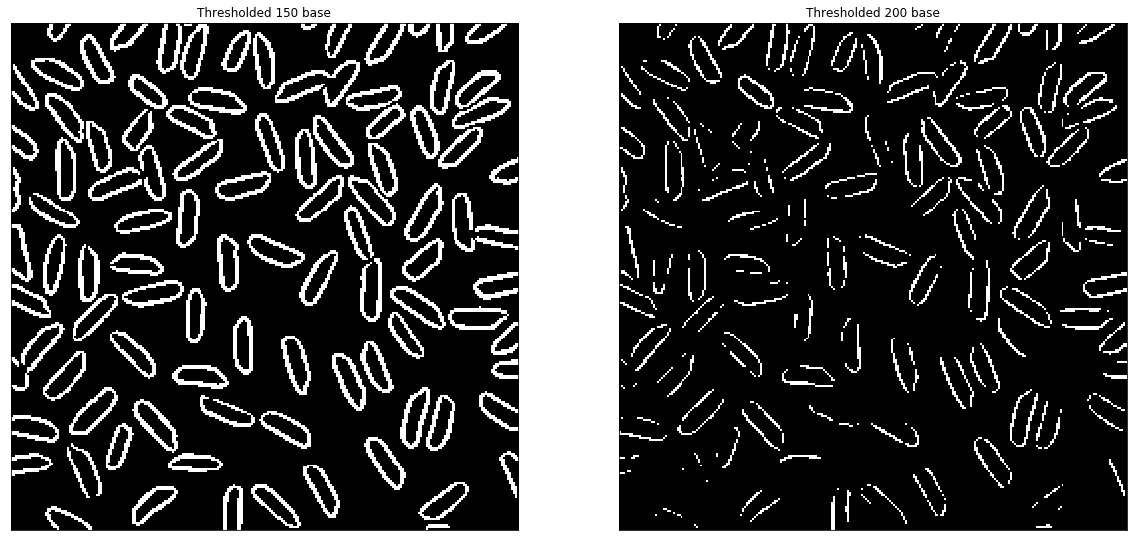

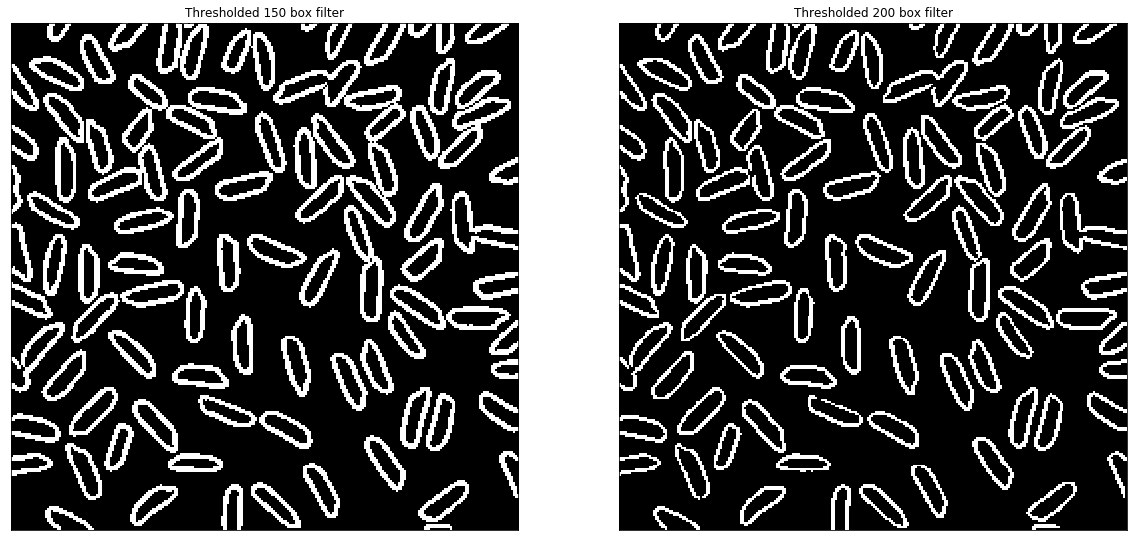

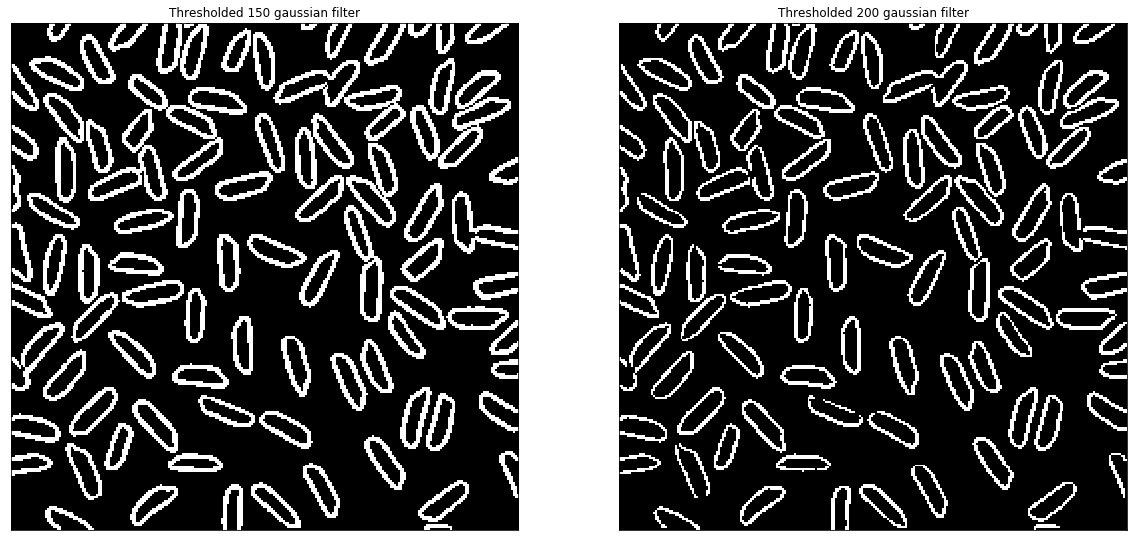

In [4]:
# Plots Sobel edge detector pair with no enhancements
plt.figure(figsize=(20, 20))
plt.subplot(121), plt.imshow(rice_thresh1, cmap="gray")
plt.title("Thresholded 150 base"), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(rice_thresh2, cmap="gray")
plt.title("Thresholded 200 base"), plt.xticks([]), plt.yticks([])
plt.show()

# Plots Sobel edge detector pair with with sharpening (box filter)
plt.figure(figsize=(20, 20))
plt.subplot(121), plt.imshow(sharpened_rice1_thresh1, cmap="gray")
plt.title("Thresholded 150 box filter"), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(sharpened_rice1_thresh2, cmap="gray")
plt.title("Thresholded 200 box filter"), plt.xticks([]), plt.yticks([])
plt.show()

# Plots Sobel edge detector pair with with sharpening (gaussian filter)
plt.figure(figsize=(20, 20))
plt.subplot(121), plt.imshow(sharpened_rice2_thresh1, cmap="gray")
plt.title("Thresholded 150 gaussian filter"), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(sharpened_rice2_thresh2, cmap="gray")
plt.title("Thresholded 200 gaussian filter"), plt.xticks([]), plt.yticks([])
plt.show()

#### The addition of initial sharpening greatly enhances the result of the edge detection in general, but especially with larger thresholds

### 2. Effect of denosing on edge detection

### Sobel edge detector no enhancements, using percentile thresholds

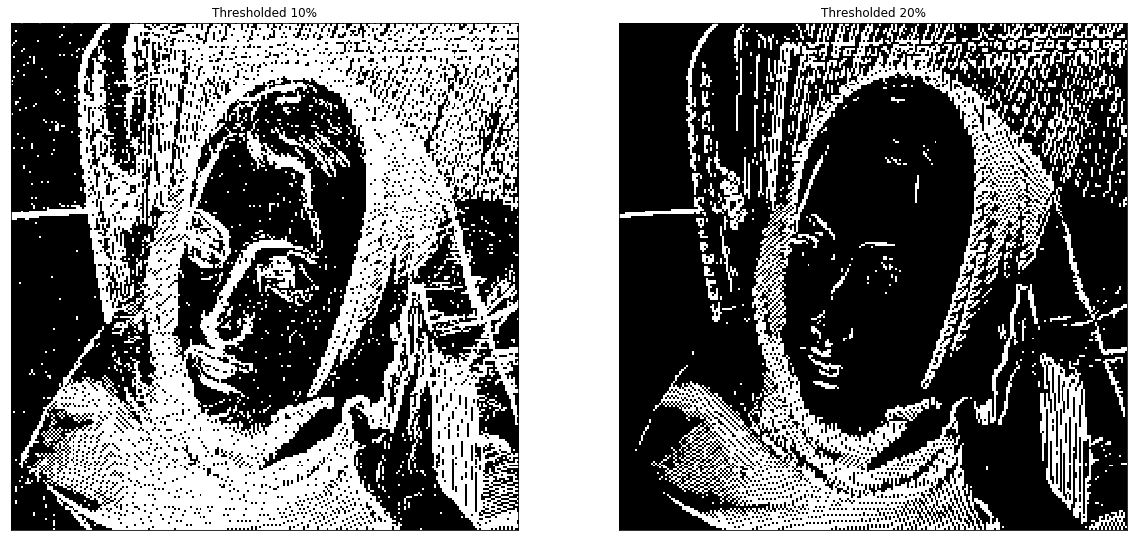

In [5]:
# load image of a woman as a grayscale image
woman_path="./woman.png"
woman = cv2.imread(woman_path, cv2.IMREAD_GRAYSCALE)

# Applies a Sobel edge detecotor for x-axis and y-axis
woman_x1 = cv2.Sobel(woman, cv2.CV_64F, 1, 0, ksize=3)
woman_y1 = cv2.Sobel(woman, cv2.CV_64F, 0, 1, ksize=3)

# Makes an edge detected image
woman_mag1 = cv2.magnitude(woman_x1, woman_y1)

# Gets the width and height of edge detected image
height, width = woman_mag1.shape

# Sets a threshold of 10% of the max value
(minVal1, maxVal1, minLoc1, maxLoc1) = cv2.minMaxLoc(woman_mag1)
THRESH7 = 0.1 * maxVal1

# Inializes a blank image with the same width and height as the 
# edge detected image for the tresholded at 10% image
woman1_thresh1 = np.zeros((height, width), dtype=np.uint8)

# If the intensity of the pixel is higher then 10% of max intensity, 
# insert a white point in the woman1_thresh1
for row in range(0, height):
    for col in range(0, width):
        if woman_mag1[row,col] > THRESH7:
            woman1_thresh1[row, col] = 255

# Sets a threshold of 10% of the max value
THRESH8 = 0.2 * maxVal1

# Inializes a blank image with the same width and height as the 
# edge detected image for the tresholded at 20% image
woman1_thresh2 = np.zeros((height, width), dtype=np.uint8)

# If the intensity of the pixel is higher then 20% of max intensity, 
# insert a white point in the woman1_thresh2
for row in range(0, height):
    for col in range(0, width):
        if woman_mag1[row,col] > THRESH8:
            woman1_thresh2[row, col] = 255

# Plots the image thresholded at 10% and the image thresholded at 20%
plt.figure(figsize=(20, 20))
plt.subplot(121), plt.imshow(woman1_thresh1, cmap="gray")
plt.title("Thresholded 10%"), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(woman1_thresh2, cmap="gray")
plt.title("Thresholded 20%"), plt.xticks([]), plt.yticks([])
plt.show()

### Sobel edge detector with denoising

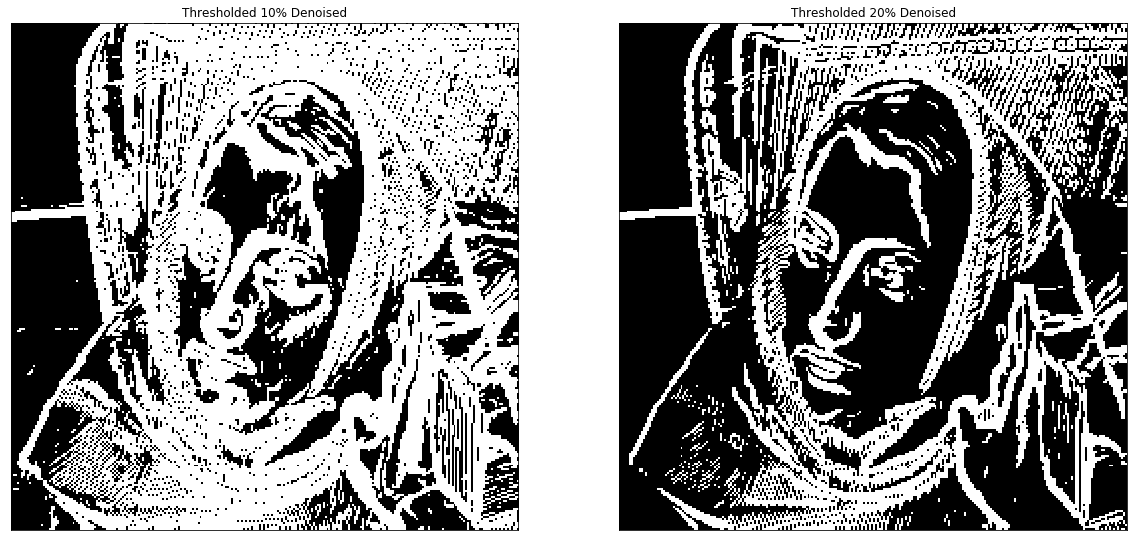

In [9]:
# Initializes a 3x3 kernel (used for box filtering)
kernel = np.ones((3,3), np.float32)/(3*3)

# Creates a box filtered image of the woman
box_woman = cv2.filter2D(woman, -1, kernel)

# Applies a Sobel edge detecotor for x-axis and y-axis
# for denoised image, box filter)
woman_x2 = cv2.Sobel(box_woman, cv2.CV_64F, 1, 0, ksize=3)
woman_y2 = cv2.Sobel(box_woman, cv2.CV_64F, 0, 1, ksize=3)

# Creates an egde detected image
# (for denoised image, box filter)
woman_mag2 = cv2.magnitude(woman_x2, woman_y2)

# Gets the width and height of edge detected image
height, width = woman_mag2.shape

# Sets a threshold of 10% of the max value
(minVal2, maxVal2, minLoc2, maxLoc2) = cv2.minMaxLoc(woman_mag2)
THRESH9 = 0.1 * maxVal2

# Inializes a blank image with the same width and height as the 
# edge detected image for the tresholded at 10% image
woman2_thresh1 = np.zeros((height, width), dtype=np.uint8)

# If the intensity of the pixel is higher then 10% of max intensity, 
# insert a white point in the woman2_thresh1
for row in range(0, height):
    for col in range(0, width):
        if woman_mag2[row,col] > THRESH9:
            woman2_thresh1[row, col] = 255

# Sets a threshold of 10% of the max value
THRESH10 = 0.2 * maxVal2

# Inializes a blank image with the same width and height as the 
# edge detected image for the tresholded at 20% image
woman2_thresh2 = np.zeros((height, width), dtype=np.uint8)

# If the intensity of the pixel is higher then 10% of max intensity, 
# insert a white point in the woman2_thresh2
for row in range(0, height):
    for col in range(0, width):
        if woman_mag2[row,col] > THRESH10:
            woman2_thresh2[row, col] = 255

# Plots the image thresholded at 10% and the image thresholded at 20%
# (for denoised image, box filter)
plt.figure(figsize=(20, 20))
plt.subplot(121), plt.imshow(woman2_thresh1, cmap="gray")
plt.title("Thresholded 10% Denoised"), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(woman2_thresh2, cmap="gray")
plt.title("Thresholded 20% Denoised"), plt.xticks([]), plt.yticks([])
plt.show()

### Commenting of result after denosing

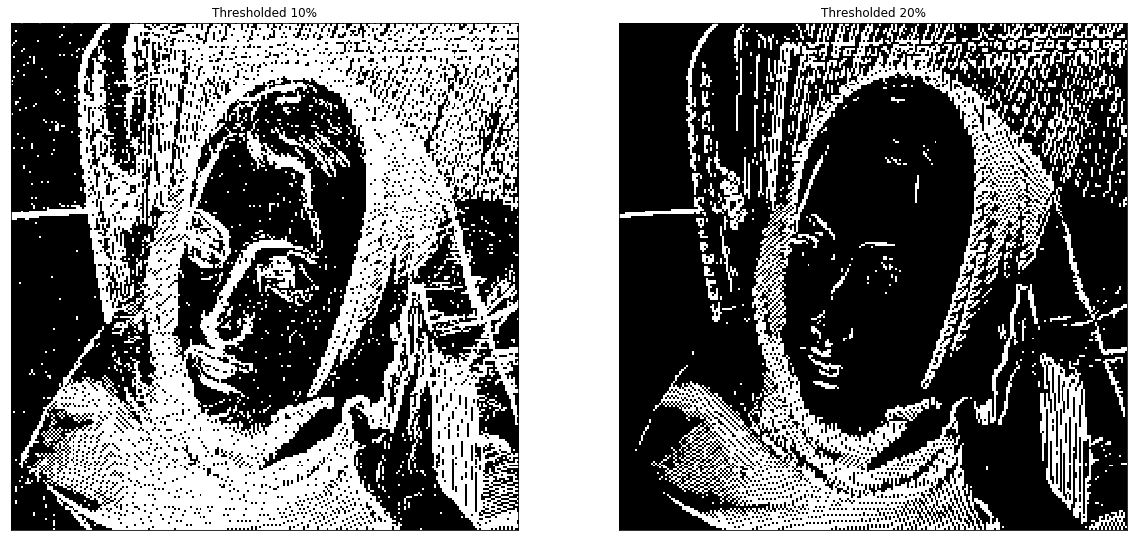

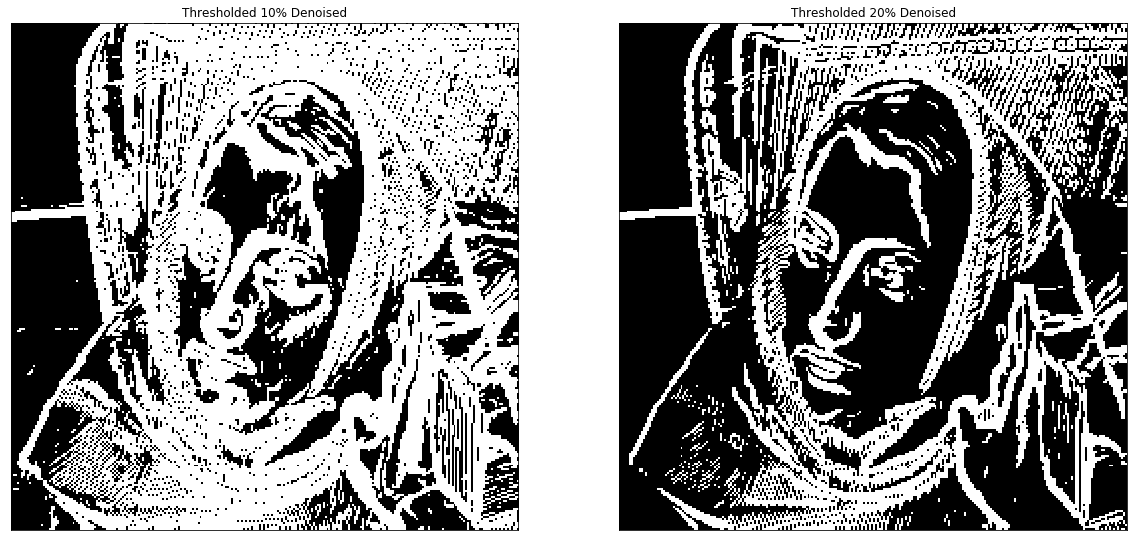

In [10]:
# Plots Sobel edge detector pair with no enhancements
plt.figure(figsize=(20, 20))
plt.subplot(121), plt.imshow(woman1_thresh1, cmap="gray")
plt.title("Thresholded 10%"), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(woman1_thresh2, cmap="gray")
plt.title("Thresholded 20%"), plt.xticks([]), plt.yticks([])
plt.show()

# Plots Sobel edge detector pair with with denoising (box filter)
plt.figure(figsize=(20, 20))
plt.subplot(121), plt.imshow(woman2_thresh1, cmap="gray")
plt.title("Thresholded 10% Denoised"), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(woman2_thresh2, cmap="gray")
plt.title("Thresholded 20% Denoised"), plt.xticks([]), plt.yticks([])
plt.show()

#### When is coms to lower thresholds, denoising seems to make the edges less pronounced, but at higher thresholds the edges seem more pronounced than the one with no enhancement